![JFM Notebooks Logo](JFM-notebooks-logo.jpg)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.gridspec import GridSpec

# Set up the figure size and font size
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 9,
    "figure.figsize": (135/25.4, 135/25.4)  # Convert from mm to inches
})

## Figure 3

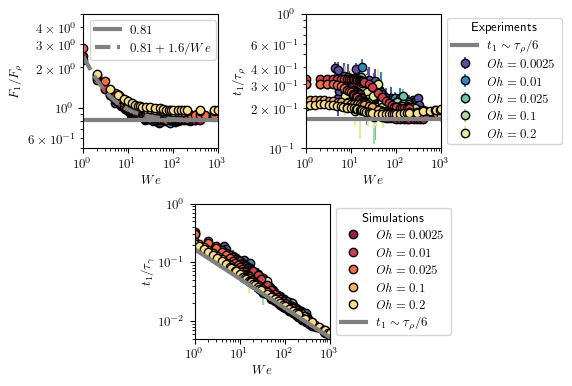

In [2]:
colors_experiments = ['#5F52A2', '#3389BE', '#6AC4A6', '#ADD7A3', '#E4EB99']
colors_simulations = ['#A01C46', '#D54050', '#F36C45', '#FAAE60', '#FBDE8A']
labels = [r'$\mathit{Oh} = 0.0025$', r'$\mathit{Oh} = 0.01$', r'$\mathit{Oh} = 0.025$', r'$\mathit{Oh} = 0.1$', r'$\mathit{Oh} = 0.2$']
OhNumbers = [0.0025, 0.01, 0.025, 0.1, 0.2]

# Create figure and GridSpec layout
fig = plt.figure(figsize=(145/25.4, 100/25.4))
gs = GridSpec(2, 2, figure=fig)

# Create axes
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])  # Span the entire bottom row

# Axis 1 (a)
ax = ax1
for i, Oh in enumerate(OhNumbers):
    file_path = f'ExpDataSet/F1_Oh_{Oh:.4f}.csv'  # Correctly format the file path
    df = pd.read_csv(file_path)
    df = df.sort_values('We')
    ax.errorbar(df['We'], df['F1'], yerr=df['F1err'], fmt='o', color=colors_experiments[i], label='_nolegend_', zorder=1, markeredgecolor='black')

for i, Oh in enumerate(OhNumbers):
    df = pd.read_csv(f'SimDataSet/Num_Oh{Oh:.4f}.csv')
    df = df.sort_values('We')
    ax.plot(df['We'], df['F1'], 'o', color=colors_simulations[i], label='_nolegend_', zorder=2, markeredgecolor='black')

ax.plot([1, 1000], [0.81, 0.81], '-', lw=3, color='gray', label=r'$0.81$')
We = np.logspace(0, 3, 100)
F1 = 0.81 + 1.6/We
ax.plot(We, F1, '--', color='gray', lw=3, label=r'$0.81 + 1.6/We$')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$We$')
ax.set_ylabel(r'$F_1/F_\rho$')
ax.set_xlim(1, 1000)
ax.set_ylim(0.5, 5)
ax.set_box_aspect(1)
ax.legend()

# Axis 2 (b)
ax = ax2
for i, Oh in enumerate(OhNumbers):
    file_path = f'ExpDataSet/t1_Oh_{Oh:.4f}.csv'  # Correctly format the file path
    df = pd.read_csv(file_path)
    df = df.sort_values('We')
    ax.errorbar(df['We'], df['t1'], yerr=df['t1err'], fmt='o', color=colors_experiments[i], label=labels[i], zorder=1, markeredgecolor='black')
for i, Oh in enumerate(OhNumbers):
    df = pd.read_csv(f'SimDataSet/Num_Oh{Oh:.4f}.csv')
    df = df.sort_values('We')
    ax.plot(df['We'], df['t1'], 'o', color=colors_simulations[i], label='_nolegend_', zorder=2, markeredgecolor='black')

ax.plot([1, 1000], [1/6, 1/6], '-', color='gray', lw=3, label=r'$t_1 \sim \tau_\rho/6$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$We$')
ax.set_ylabel(r'$t_1/\tau_\rho$')
ax.set_xlim(1, 1000)
ax.set_ylim(0.1, 1)
ax.set_box_aspect(1)

# legend outside of the plot on the right 
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Experiments")

# Axis 3 (c)
ax = ax3
for i, Oh in enumerate(OhNumbers):
    file_path = f'ExpDataSet/t1_Oh_{Oh:.4f}.csv'  # Correctly format the file path
    df = pd.read_csv(file_path)
    df = df.sort_values('We')
    ax.errorbar(df['We'], df['t1']/np.sqrt(df['We']), yerr=df['t1err']/np.sqrt(df['We']), label='_nolegend_', fmt='o', color=colors_experiments[i], zorder=1, markeredgecolor='black')
for i, Oh in enumerate(OhNumbers):
    df = pd.read_csv(f'SimDataSet/Num_Oh{Oh:.4f}.csv')
    df = df.sort_values('We')
    ax.plot(df['We'], df['t1']/np.sqrt(df['We']), 'o', color=colors_simulations[i], label=labels[i], zorder=2, markeredgecolor='black')

We = np.logspace(0, 3, 100)
t1 = (1/6)/np.sqrt(We)
ax.plot(We, t1, '-', color='gray', lw=3,label=r'$t_1 \sim \tau_\rho/6$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$We$')
ax.set_ylabel(r'$t_1/\tau_\gamma$')
ax.set_xlim(1, 1000)
ax.set_ylim(0.005, 1)
ax.set_box_aspect(1)
# legend outside of the plot on the right 
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Simulations")

# Ensure layout is tight
plt.tight_layout()
plt.savefig('Figure3.pdf')
plt.savefig('Figure3.png', dpi=300)
plt.show()

## Figure 7

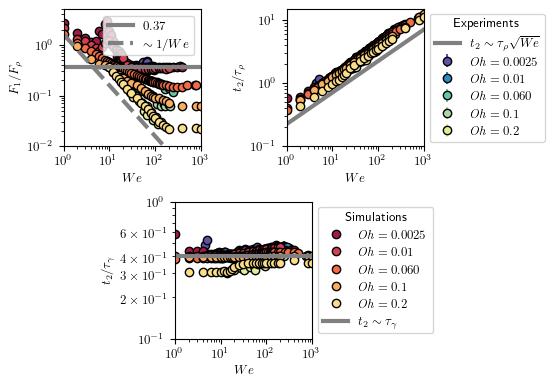

In [3]:
colors_experiments = ['#5F52A2', '#3389BE', '#6AC4A6', '#ADD7A3', '#E4EB99']
colors_simulations = ['#A01C46', '#D54050', '#F36C45', '#FAAE60', '#FBDE8A']
labels = [r'$\mathit{Oh} = 0.0025$', r'$\mathit{Oh} = 0.01$', r'$\mathit{Oh} = 0.060$', r'$\mathit{Oh} = 0.1$', r'$\mathit{Oh} = 0.2$']
OhNumbers = [0.0025, 0.01, 0.06, 0.1, 0.2]

# Create figure and GridSpec layout
fig = plt.figure(figsize=(145/25.4, 100/25.4))
gs = GridSpec(2, 2, figure=fig)

# Create axes
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])  # Span the entire bottom row

# Axis 1 (a)
ax = ax1
for i, Oh in enumerate(OhNumbers):
    file_path = f'ExpDataSet/F2_Oh_{Oh:.4f}.csv'  # Correctly format the file path
    df = pd.read_csv(file_path)
    df = df.sort_values('We')
    ax.errorbar(df['We'], df['F2'], yerr=df['F2err'], fmt='o', color=colors_experiments[i], label='_nolegend_', zorder=1, markeredgecolor='black')

for i, Oh in enumerate(OhNumbers):
    df = pd.read_csv(f'SimDataSet/Num_Oh{Oh:.4f}.csv')
    df = df.sort_values('We')
    ax.plot(df['We'], df['F2'], 'o', color=colors_simulations[i], label='_nolegend_', zorder=2, markeredgecolor='black')

ax.plot([1, 1000], [0.37, 0.37], '-', lw=3, color='gray', label=r'$0.37$')
We = np.logspace(0, 3, 100)
F2 = 1.6/We
ax.plot(We, F2, '--', color='gray', lw=3, label=r'$\sim 1/We$')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$We$')
ax.set_ylabel(r'$F_1/F_\rho$')
ax.set_xlim(1, 1000)
ax.set_ylim(0.01, 5)
ax.set_box_aspect(1)
ax.legend()

# Axis 2 (b)
ax = ax2
for i, Oh in enumerate(OhNumbers):
    file_path = f'ExpDataSet/t2_Oh_{Oh:.4f}.csv'  # Correctly format the file path
    df = pd.read_csv(file_path)
    df = df.sort_values('We')
    ax.errorbar(df['We'], df['t2'], yerr=df['t2err'], fmt='o', color=colors_experiments[i], label=labels[i], zorder=1, markeredgecolor='black')
for i, Oh in enumerate(OhNumbers):
    df = pd.read_csv(f'SimDataSet/Num_Oh{Oh:.4f}.csv')
    df = df.sort_values('We')
    ax.plot(df['We'], df['t2'], 'o', color=colors_simulations[i], label='_nolegend_', zorder=2, markeredgecolor='black')

We = np.logspace(0, 3, 100)
t2 = 0.225*np.sqrt(We)
ax.plot(We, t2, '-', color='gray', lw=3, label=r'$t_2 \sim \tau_\rho\sqrt{We}$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$We$')
ax.set_ylabel(r'$t_2/\tau_\rho$')
ax.set_xlim(1, 1000)
ax.set_ylim(0.1, 15)
ax.set_box_aspect(1)

# legend outside of the plot on the right 
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Experiments")

# Axis 3 (c)
ax = ax3
for i, Oh in enumerate(OhNumbers):
    file_path = f'ExpDataSet/t2_Oh_{Oh:.4f}.csv'  # Correctly format the file path
    df = pd.read_csv(file_path)
    df = df.sort_values('We')
    ax.errorbar(df['We'], df['t2']/np.sqrt(df['We']), yerr=df['t2err']/np.sqrt(df['We']), label='_nolegend_', fmt='o', color=colors_experiments[i], zorder=1, markeredgecolor='black')
for i, Oh in enumerate(OhNumbers):
    df = pd.read_csv(f'SimDataSet/Num_Oh{Oh:.4f}.csv')
    df = df.sort_values('We')
    ax.plot(df['We'], df['t2']/np.sqrt(df['We']), 'o', color=colors_simulations[i], label=labels[i], zorder=2, markeredgecolor='black')

ax.plot([1,1000], [0.4,0.4], '-', color='gray', lw=3,label=r'$t_2 \sim \tau_\gamma$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$We$')
ax.set_ylabel(r'$t_2/\tau_\gamma$')
ax.set_xlim(1, 1000)
ax.set_ylim(0.1, 1)
ax.set_box_aspect(1)
# legend outside of the plot on the right 
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Simulations")

# Ensure layout is tight
plt.tight_layout()
plt.savefig('Figure7.pdf')
plt.savefig('Figure7.png', dpi=300)
plt.show()